In [7]:
# single depth tide filters
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
%matplotlib notebook

In [3]:
# Axis January and February
with xr.open_dataset('../Nov11/AxisJanFeb2018.nc') as ds:
    print(ds)

<xarray.Dataset>
Dimensions:    (depth: 80, latitude: 1, longitude: 1, time: 1404)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T00:30:00.000003328 ... 2018-02-28T11:29:59.999996672
  * depth      (depth) float32 968.2709 960.2709 ... 344.27084 336.27084
  * latitude   (latitude) float32 48.3166
  * longitude  (longitude) float32 -126.0508
Data variables:
    u          (time, depth) float32 ...
    v          (time, depth) float32 ...
    w          (time, depth) float32 ...
    temp       (time) float32 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE:    

In [4]:
# find specific depth (400 m)
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx     # returns index of nearest value

array = ds.depth
value = 400      # meters

print("Index:", find_nearest(array, value))
print("Value:", abs(array[find_nearest(array, value)]))

Index: 71
Value: <xarray.DataArray 'depth' ()>
array(400.27084, dtype=float32)
Coordinates:
    depth    float32 400.27084


In [5]:
# single depth (400 m) remove NaN from time series
with xr.open_dataset('../Nov11/AxisJanFeb2018.nc') as ds:
    
    u400 = np.array(ds.u[:,71])
    v400 = np.array(ds.v[:,71])
    w400 = np.array(ds.w[:,71])
    
    inds_u400 = np.where(np.isnan(u400))   
    u400_mean = np.nanmean(u400)           
    u400[inds_u400] = u400_mean            # remove NaN values
    
    inds_v400 = np.where(np.isnan(v400))   
    v400_mean = np.nanmean(v400)           
    v400[inds_v400] = v400_mean            # remove NaN values
    
    inds_w400 = np.where(np.isnan(w400))   
    w400_mean = np.nanmean(w400)           
    w400[inds_w400] = w400_mean            # remove NaN values

<IPython.core.display.Javascript object>


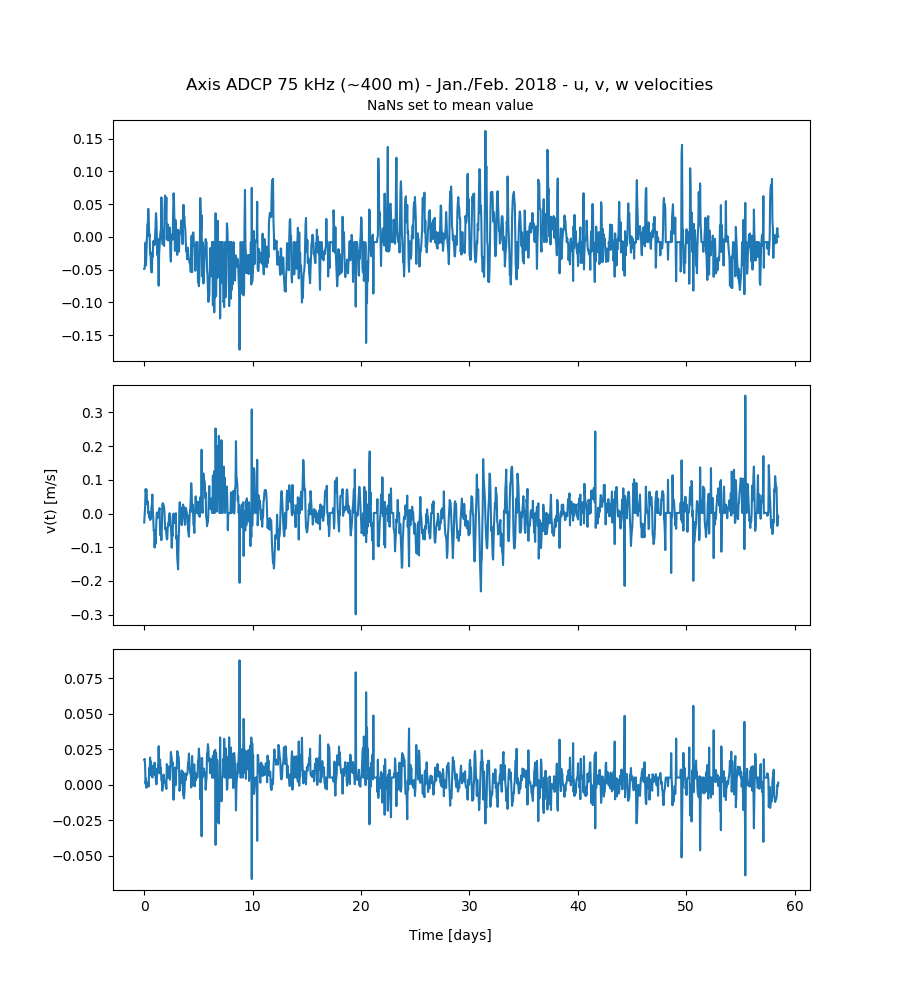

In [8]:
# single depth (400 m) plot time series
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'NaNs set to mean value', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u400)
ax2.plot(np.linspace(0,58.5,1404), v400)
ax3.plot(np.linspace(0,58.5,1404), w400)
plt.show()

In [9]:
# single depth (400 m) remove mean from time series
u400m = u400 - u400_mean            
v400m = v400 - v400_mean              
w400m = w400 - w400_mean               

<IPython.core.display.Javascript object>


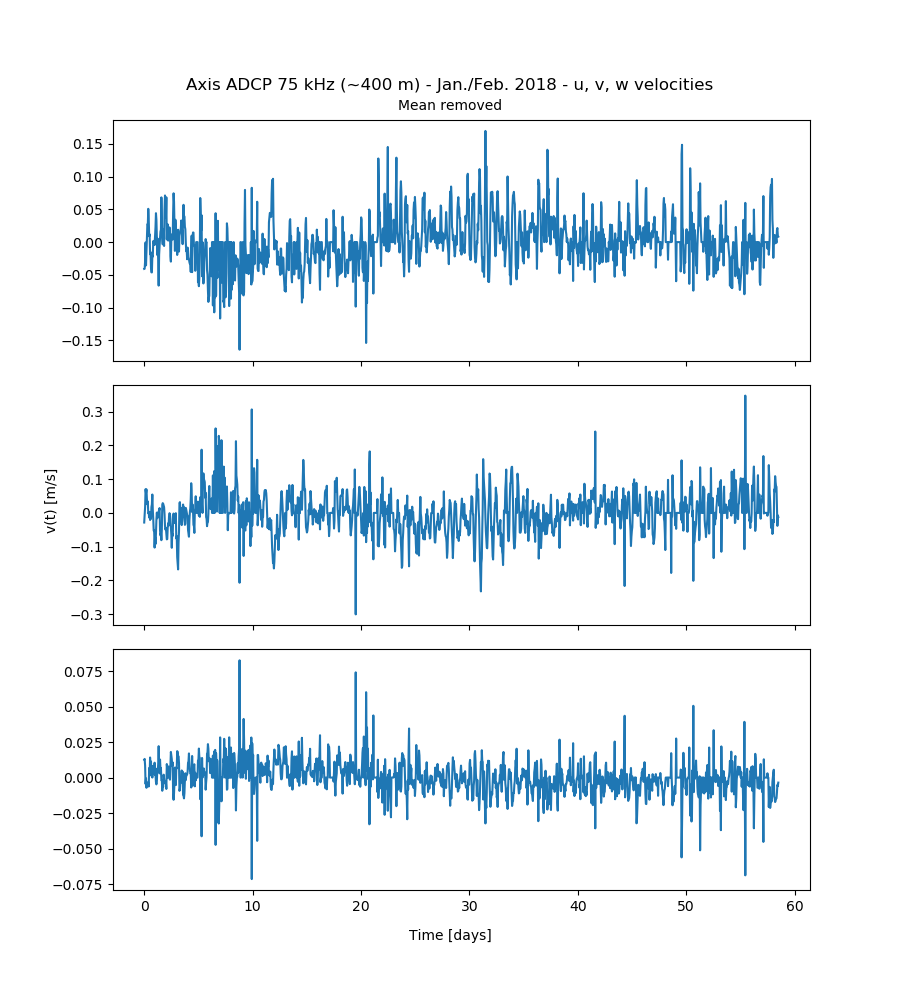

In [63]:
# single depth (400 m) plots w/ removed mean (nearly identical to above)
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Mean removed', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u400m)
ax2.plot(np.linspace(0,58.5,1404), v400m)
ax3.plot(np.linspace(0,58.5,1404), w400m)
plt.show()

<IPython.core.display.Javascript object>


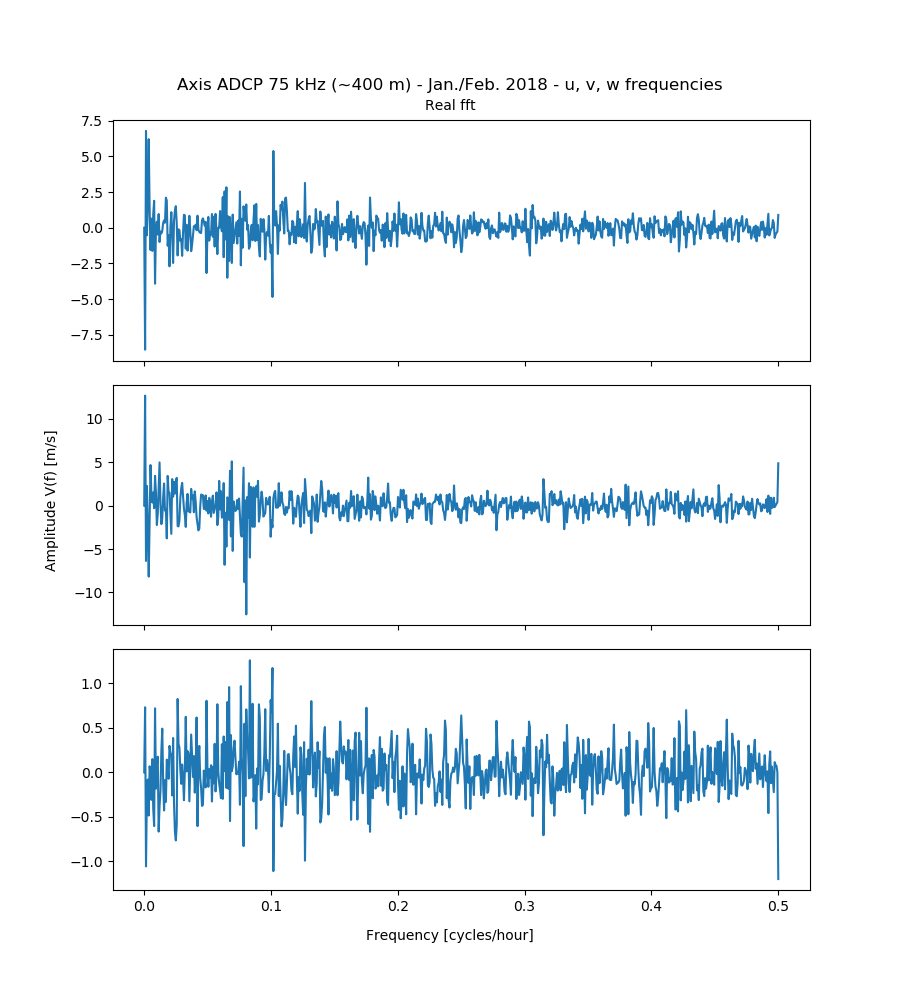

In [13]:
# 1D single depth (400 m) normalised FFT

ufft = np.fft.rfft(u400m)
ufreq = np.fft.rfftfreq(u400m.shape[0])
vfft = np.fft.rfft(v400m)
vfreq = np.fft.rfftfreq(v400m.shape[0])
wfft = np.fft.rfft(w400m)
wfreq = np.fft.rfftfreq(w400m.shape[0])

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Real fft', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'Amplitude V(f) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Frequency [cycles/hour]', ha='center')

ax1.plot(ufreq, ufft)
ax2.plot(vfreq, vfft)
ax3.plot(wfreq, wfft)
plt.show()

<IPython.core.display.Javascript object>


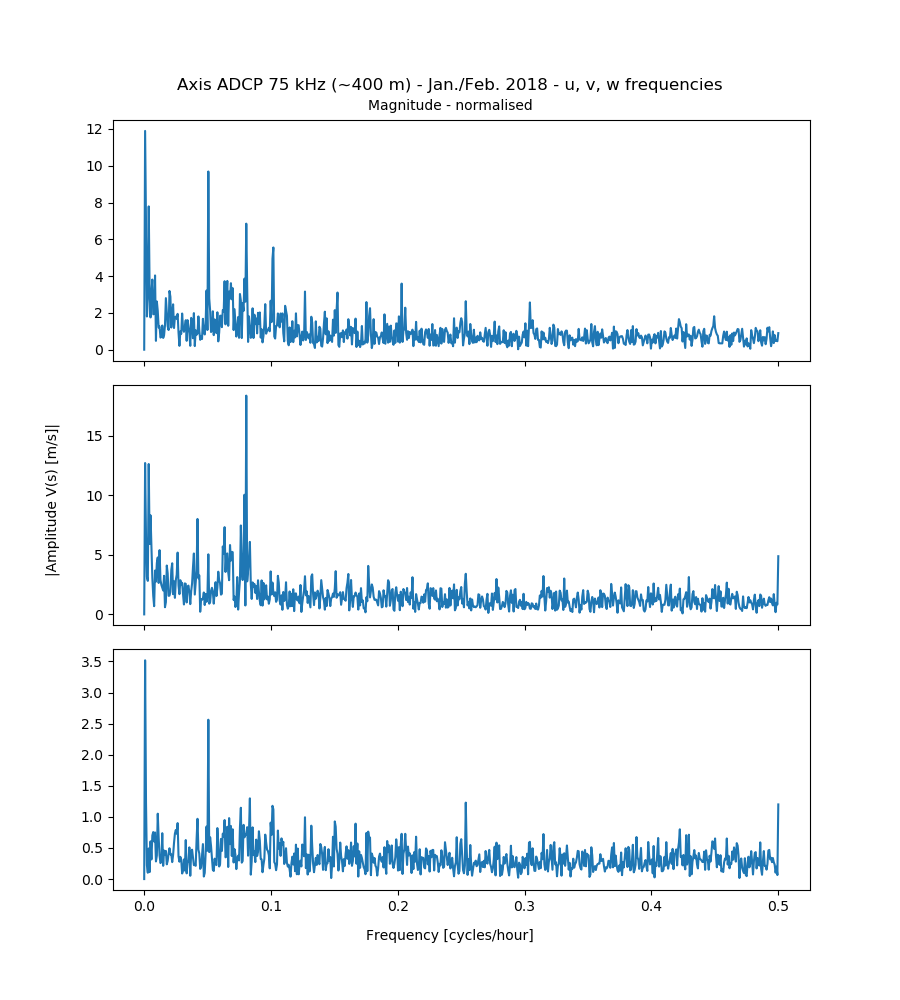

In [58]:
# 1D single depth (400 m) normalised FFT

ufft_2 = abs(ufft)
vfft_2 = abs(vfft)
wfft_2 = abs(wfft)

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Magnitude - normalised', ha='center', fontsize=10)
fig.text(0.05, 0.5, '|Amplitude V(s) [m/s]|', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Frequency [cycles/hour]', ha='center')

ax1.plot(sorted(ufreq), ufft_2)
ax2.plot(sorted(vfreq), vfft_2)
ax3.plot(sorted(wfreq), wfft_2)
plt.show()

<IPython.core.display.Javascript object>


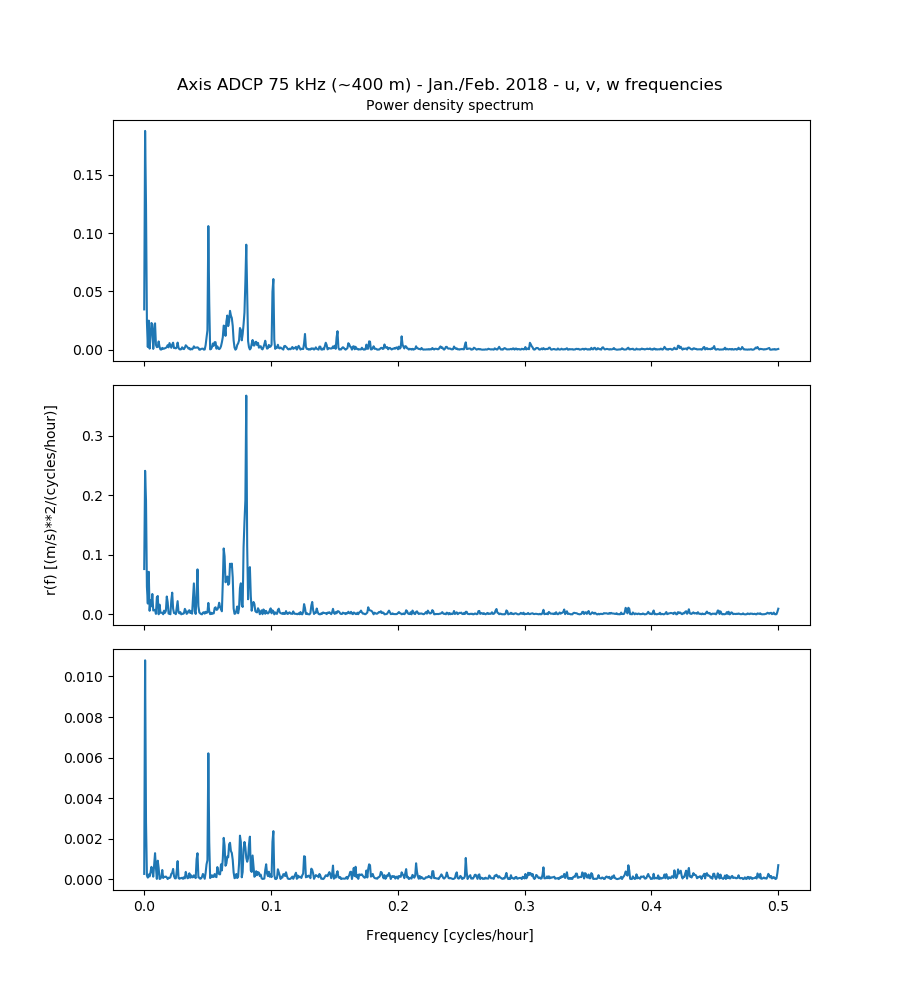

In [21]:
# PDS of single depth (400 m) time series, looks similar (except normalised and squared)
U400f, U400pds = sig.periodogram(u400m, window='hann')
V400f, V400pds = sig.periodogram(v400m, window='hann')
W400f, W400pds = sig.periodogram(w400m, window='hann')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Power density spectrum', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'r(f) [(m/s)**2/(cycles/hour)]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Frequency [cycles/hour]', ha='center')

ax1.plot(U400f,U400pds)
ax2.plot(V400f,V400pds)
ax3.plot(W400f,W400pds)
plt.show()

# 'zero' frequency could be due to NaN set to mean values
# higher frequencies should be a mixture of K1, f, M2, M4

In [106]:
# low pass Butterworth filter for 30 hours to remove tides
fs = 1                # 1 sample per hour for entire time series
fc = 0.033            # 30 hour low pass filter
Wn = fc / (fs / 2)    # normalised cut-off frequencies
b, a = sig.butter(12, Wn, 'lowpass')  # digital butterworth filter
w, h = sig.freqz(b, a, fs = 1)

u400m30 = sig.filtfilt(b, a, u400m)
v400m30 = sig.filtfilt(b, a, v400m)
w400m30 = sig.filtfilt(b, a, w400m)

<IPython.core.display.Javascript object>


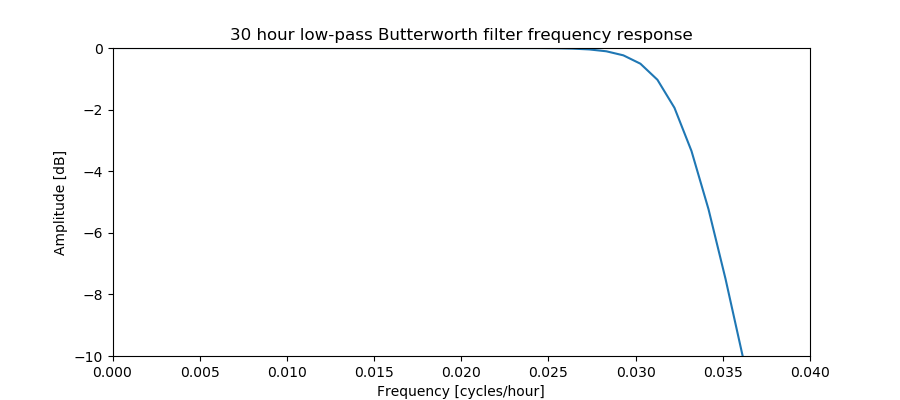

In [109]:
# check filter response
plt.figure(figsize=(9,4))
#plt.plot(fs/2*w, abs(h))
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlim(0,0.04)
plt.ylim(-10,0)
plt.xlabel("Frequency [cycles/hour]")
plt.ylabel("Amplitude [dB]")
plt.title("30 hour low-pass Butterworth filter frequency response")
plt.show()

<IPython.core.display.Javascript object>


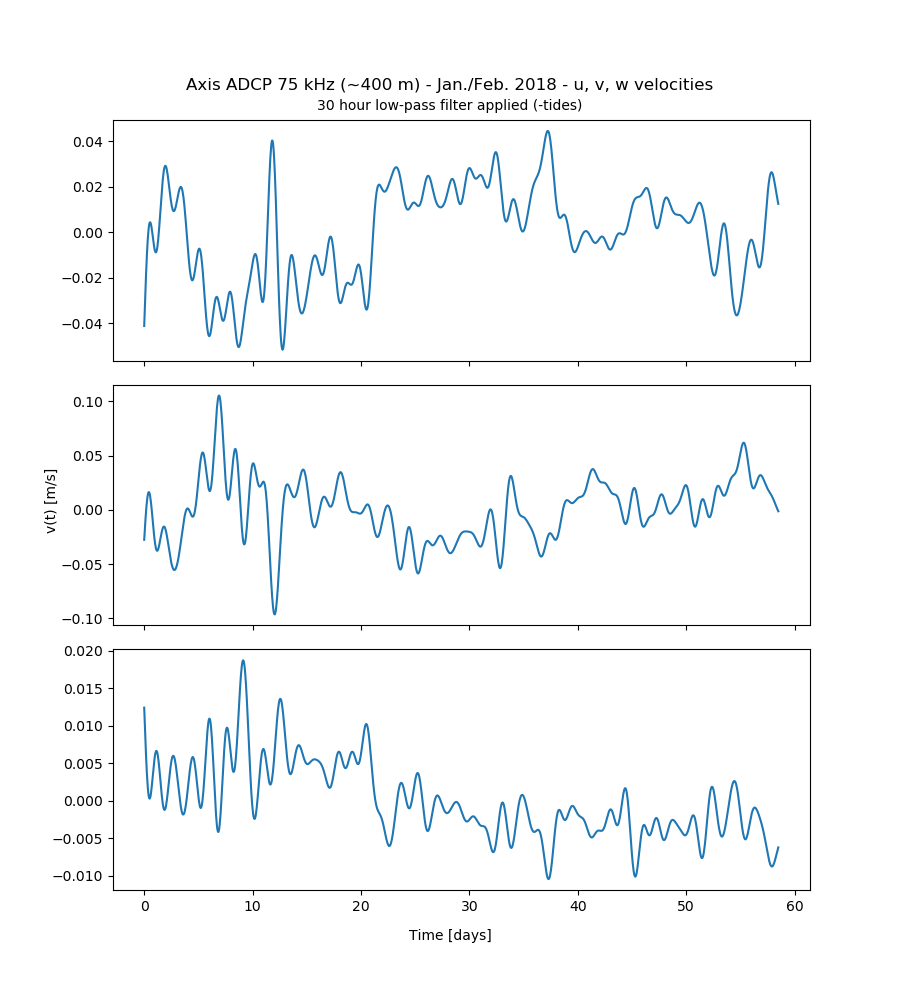

In [119]:
# single depth (400 m) plots w/ removed tides (30 hr low pass filter)
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, '30 hour low-pass filter applied (-tides)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u400m30)
ax2.plot(np.linspace(0,58.5,1404), v400m30)
ax3.plot(np.linspace(0,58.5,1404), w400m30)
plt.show()

<IPython.core.display.Javascript object>


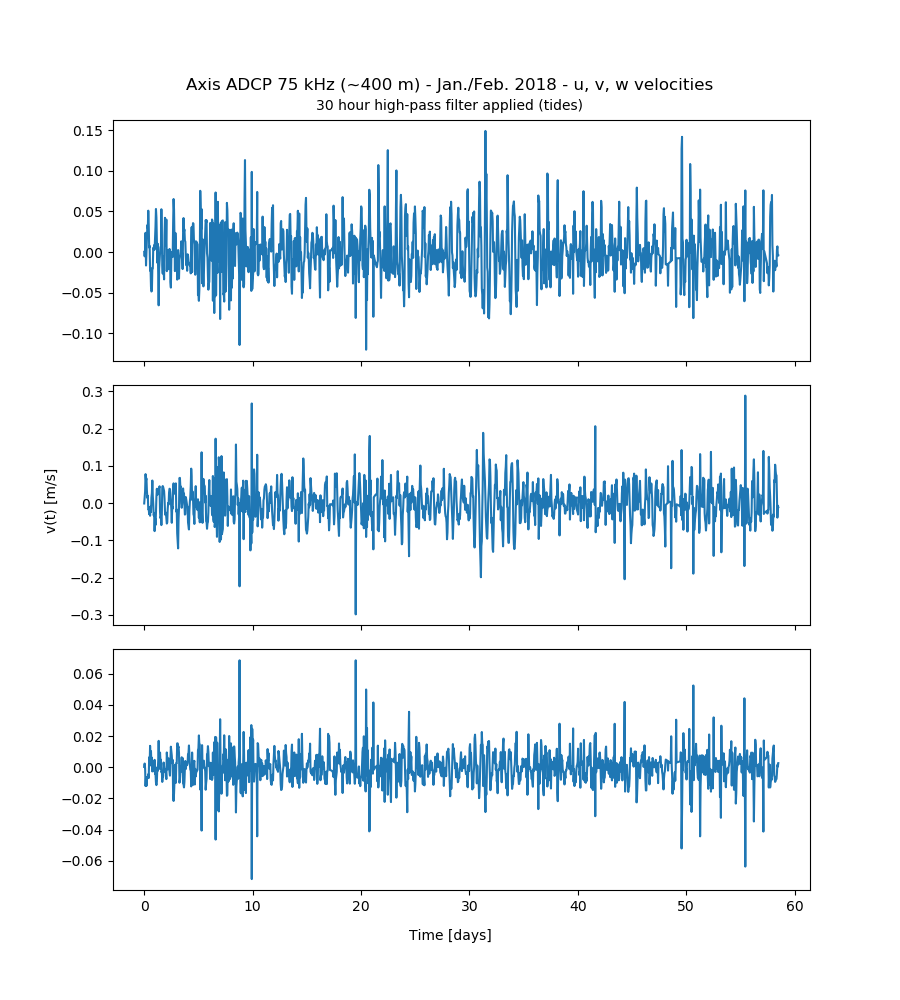

In [112]:
# high-pass tidal data from (original - filtered)
u400mhp = u400m - u400m30
v400mhp = v400m - v400m30
w400mhp = w400m - w400m30

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, '30 hour high-pass filter applied (tides)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u400mhp)
ax2.plot(np.linspace(0,58.5,1404), v400mhp)
ax3.plot(np.linspace(0,58.5,1404), w400mhp)
plt.show()

<IPython.core.display.Javascript object>


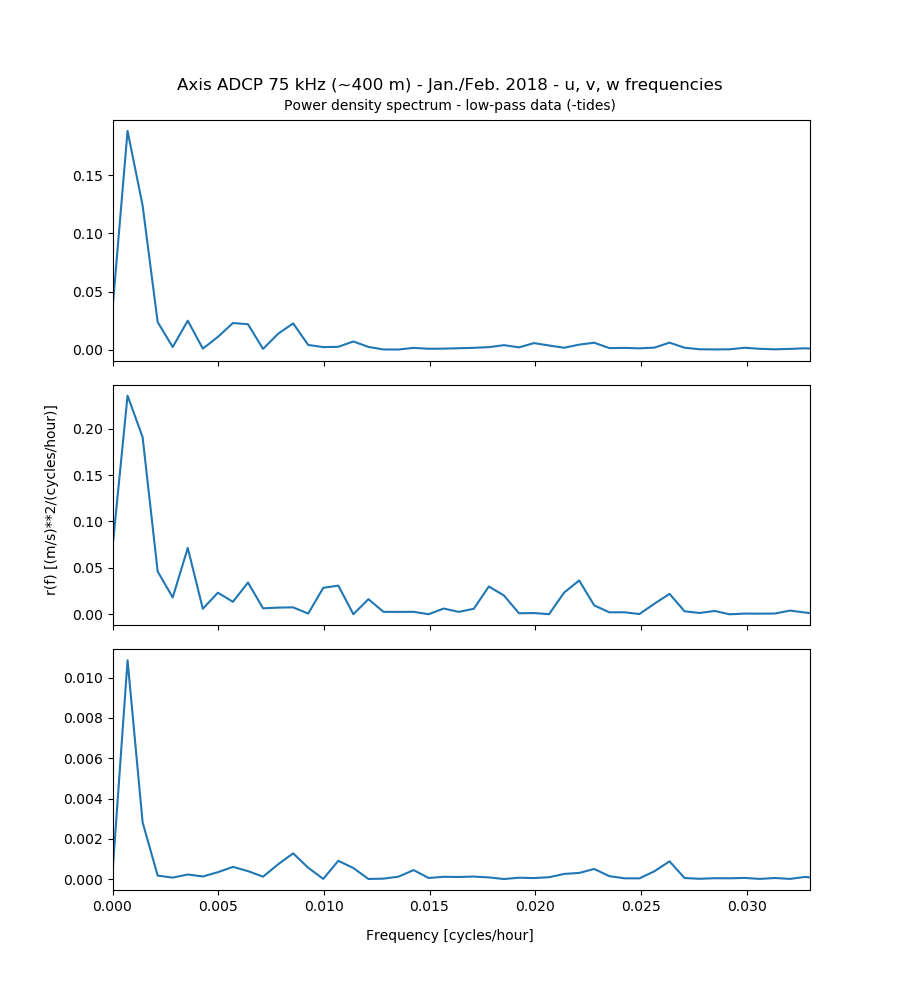

In [125]:
# PDS of low-pass time series
U400m30f, U400m30pds = sig.periodogram(u400m30, window='hann')
V400m30f, V400m30pds = sig.periodogram(v400m30, window='hann')
W400m30f, W400m30pds = sig.periodogram(w400m30, window='hann')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Power density spectrum - low-pass data (-tides)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'r(f) [(m/s)**2/(cycles/hour)]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Frequency [cycles/hour]', ha='center')

ax1.set(xlim=(0, 0.033))
ax1.plot(U400m30f,U400m30pds)
ax2.plot(V400m30f,V400m30pds)
ax3.plot(W400m30f,W400m30pds)
plt.show()

<IPython.core.display.Javascript object>


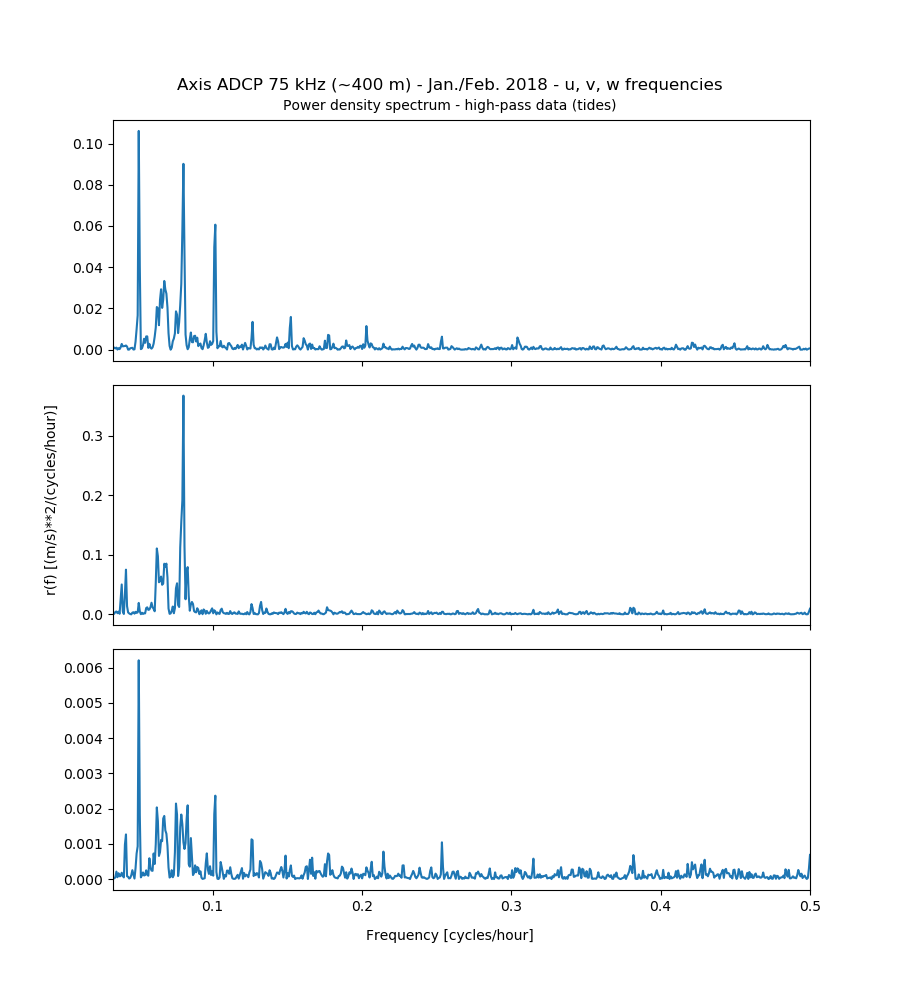

In [124]:
# PDS of low-pass time series
U400mhpf, U400mhppds = sig.periodogram(u400mhp, window='hann')
V400mhpf, V400mhppds = sig.periodogram(v400mhp, window='hann')
W400mhpf, W400mhppds = sig.periodogram(w400mhp, window='hann')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~400 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Power density spectrum - high-pass data (tides)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'r(f) [(m/s)**2/(cycles/hour)]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Frequency [cycles/hour]', ha='center')

ax1.set(xlim=(0.033, 0.5))
ax1.plot(U400mhpf,U400mhppds)
ax2.plot(V400mhpf,V400mhppds)
ax3.plot(W400mhpf,W400mhppds)
plt.show()